# **This code implements a CNN using TensorFlow/Keras to classify CIFAR-10 images. It loads and normalizes the dataset, builds a model with convolutional, pooling, and dense layers, and trains it for 20 epochs using the Adam optimizer and categorical crossentropy loss. The model outputs class probabilities for 10 categories.**

In [1]:
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
import tensorflow.keras.datasets.cifar10 as cifar10
from tensorflow.keras.utils import to_categorical

# Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize images
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model with correct input shape
model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),  # Updated to match CIFAR-10 image shape

    # If you want to convert to grayscale or single channel
    # layers.Reshape((32, 32, 3)),  # Not needed, as input shape is already (32, 32, 3)
    # Or if you want to convert to grayscale:
    # layers.Conv2D(1, (1, 1)),  # optional, or use other methods

    # Your existing convolutional layers
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.GlobalAveragePooling2D(),
    layers.Dense(10, activation='softmax')
])

model.summary()

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, epochs=20, batch_size=32)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,602 (260.16 KB)

 Trainable params: 66,410 (259.41 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.4383 - loss: 1.5485
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6465 - loss: 0.9989
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7062 - loss: 0.8445
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7405 - loss: 0.7482
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7667 - loss: 0.6734
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7871 - loss: 0.6187
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8049 - loss: 0.5723
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8193 - loss: 0.5247
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8330 - loss: 0.4833
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8423 - loss: 0.4575
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8500 - loss: 0.4347
Epoch 12/20
1563/1563 ━━

# **This code evaluates the CIFAR-10 model's performance by plotting ROC curves for each class. It computes predicted probabilities using `model.predict`, calculates ROC metrics (FPR, TPR, AUC) for each of the 10 classes, and visualizes them with distinct colors, including a chance line for reference.**

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


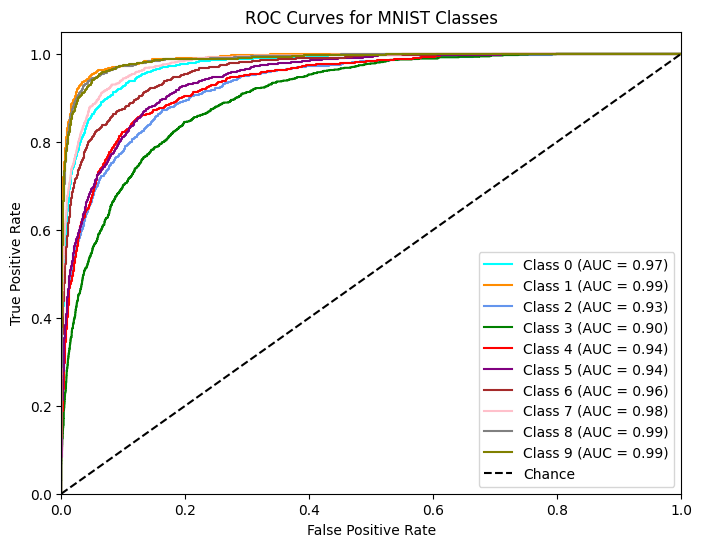

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Step 1: Get predicted probabilities for the test set
y_pred_proba = model.predict(x_test)

# Number of classes
n_classes = y_test.shape[1]

# Step 2: Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Step 3: Plot all ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for MNIST Classes')
plt.legend(loc='lower right')
plt.show()


# **This code selects one sample image for each CIFAR-10 class (0-9) from the test set, predicts their labels using the trained model, and visualizes them in a 2x5 grid. Each image is displayed with its true label and predicted label, using `matplotlib` for plotting.**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


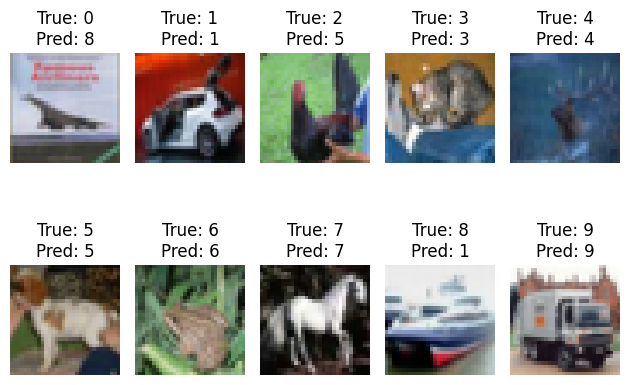

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Function to get one example of each digit (0-9) from the test set
def get_samples_for_digits(x_test, y_test):
    samples = []
    labels = []
    for digit in range(10):
        # Find the index where the label equals the digit
        idx = np.where(np.argmax(y_test, axis=1) == digit)[0][0]
        samples.append(x_test[idx])
        labels.append(digit)
    return np.array(samples), labels

# Get one sample for each digit
samples, labels = get_samples_for_digits(x_test, y_test)

# Predict the labels for these samples
predictions = model.predict(samples)

# Plot and show the images with predicted and true labels
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(samples[i], cmap='gray')
    plt.title(f"True: {labels[i]}\nPred: {np.argmax(predictions[i])}")
    plt.axis('off')

plt.tight_layout()
plt.show()


This code loads an image (`horse.jpg`), resizes it to 32x32 to match the CIFAR-10 model's input shape, and normalizes its pixel values to [0, 1]. The image is then prepared as a batch of one sample and passed to the trained model for prediction, outputting the probability distribution and the predicted class index.

In [6]:
import cv2
import numpy as np

# Load image
img_path = '/content/horse.jpg'
img = cv2.imread(img_path)

if img is None:
    print(f"Error: Could not load image at {img_path}")
else:
    # Resize to 32x32
    img_resized = cv2.resize(img, (32, 32))

    # Normalize pixel values to [0,1]
    img_normalized = img_resized.astype(np.float32) / 255.0

    # Prepare input for model: shape (1, 32, 32, 3)
    input_img = np.expand_dims(img_normalized, axis=0)

    # Make prediction
    predict = model.predict(input_img)

    print(predict)
    print("Predicted class:", np.argmax(predict))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[9.8504475e-04 2.3575892e-06 1.6824458e-08 2.0367222e-02 7.3704672e-07
  1.8787932e-01 1.1675383e-05 7.9067326e-01 1.9015474e-06 7.8426878e-05]]
Predicted class: 7


**powerd by Miracle⚡**